In [47]:
import cv2 as cv
import os
from numpy.random import randint
import numpy as np
from matplotlib import pyplot as plt

In [101]:
IMAGE_DIR = '../construction_images/'
GROUND_TRUTH_DIR = '../mAP/input/ground-truth/'
GROUND_TRUTH_DATASET = '../original_dataset/dataset.txt'
SPLIT_DEV_DATASET = '../construction_labels/construction_dev.txt'
DETECTION_RESULTS_DIR = '../mAP/input/detection-results/'

In [109]:
class_dict = {}

with open('../construction_labels/construction.names','r') as f:
    class_list = f.readlines()
    
for idx, classname in enumerate(class_list):
    class_dict[str(idx)] = classname.strip()

#### Investigating Original Dataset

5 items to plot
person
person
safetyvest
person
hardhat


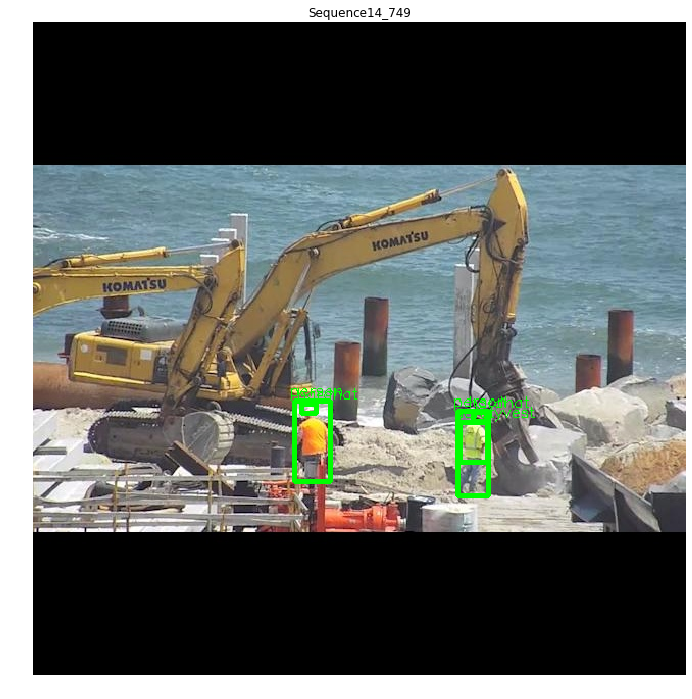

In [121]:
with open(GROUND_TRUTH_DATASET, 'r') as f:
    orig_data = f.readlines()

num_files = len(orig_data)
random_idx = randint(0,num_files)
text_row = orig_data[random_idx]

text_list = text_row.split()

image_bgr = cv.imread(IMAGE_DIR + text_list[0])
image = cv.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

num_items = int(len(text_list[1:])/5)

print(f"{num_items} items to plot")

font = cv.FONT_HERSHEY_SIMPLEX

for item in range(num_items):
    print(label)
    start_idx = 5 * item + 1
    x_min = int(float(text_list[start_idx]))
    y_min = int(float(text_list[start_idx + 1]) + 140)
    x_max = int(float(text_list[start_idx + 2]))
    y_max = int(float(text_list[start_idx + 3]) + 140)
    label = text_list[start_idx + 4]
    
    cv.rectangle(image,(x_min, y_min),(x_max, y_max),(0,255,0),3)
    cv.putText(image, label, (x_min - 5, y_min - 5), font, .5, (0,255,0))

fig = plt.figure(figsize=(12,12))
plt.title(text_filepath.split('.')[0])
plt.axis('off')
plt.imshow(image)

#### Investigating Split Dataset

./construction_images/Sequence06_243__fliph.jpeg 565.3,294.0,576.32,322.24,1 314.5,258.4,327.04,283.42,1 265.0,236.0,274.0,258.0,1

3 items to plot


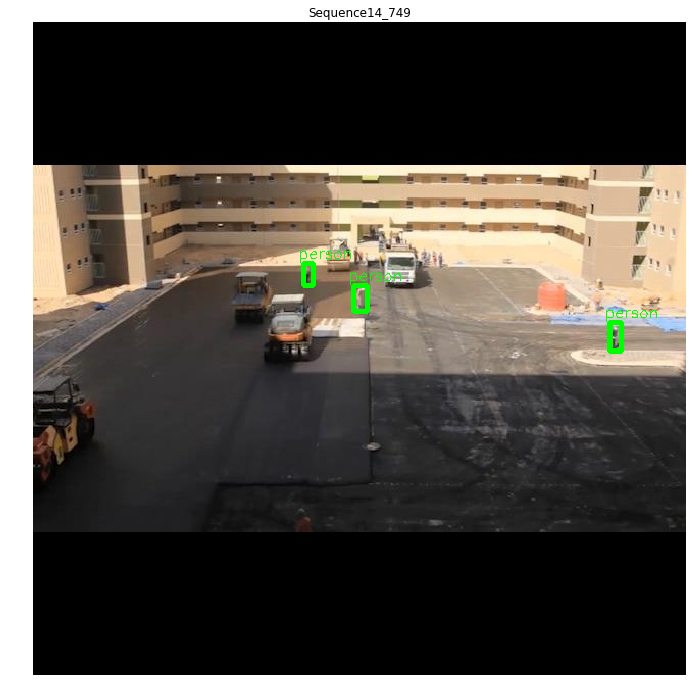

In [122]:
with open(SPLIT_DEV_DATASET, 'r') as f:
    split_dev = f.readlines()

num_files = len(split_dev)
random_idx = randint(0,num_files)
text_row = split_dev[random_idx]

text_list = text_row.split()

print(text_row)

image_bgr = cv.imread('.' + text_list[0])
image = cv.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

num_items = int(len(text_list[1:]))

print(f"{num_items} items to plot")

font = cv.FONT_HERSHEY_SIMPLEX

for item in text_list[1:]:
    coords = item.split(',')
    x_min = int(float(coords[0]))
    y_min = int(float(coords[1]))
    x_max = int(float(coords[2]))
    y_max = int(float(coords[3]))
    label = class_dict[coords[4]]
    
    cv.rectangle(image,(x_min, y_min),(x_max, y_max),(0,255,0),3)
    cv.putText(image, label, (x_min - 5, y_min-5), font, .5, (0,255,0))

fig = plt.figure(figsize=(12,12))
plt.title(text_filepath.split('.')[0])
plt.axis('off')
plt.imshow(image)

#### Investigating Ground Truth Files

Drew 18 ground-truth boxes.


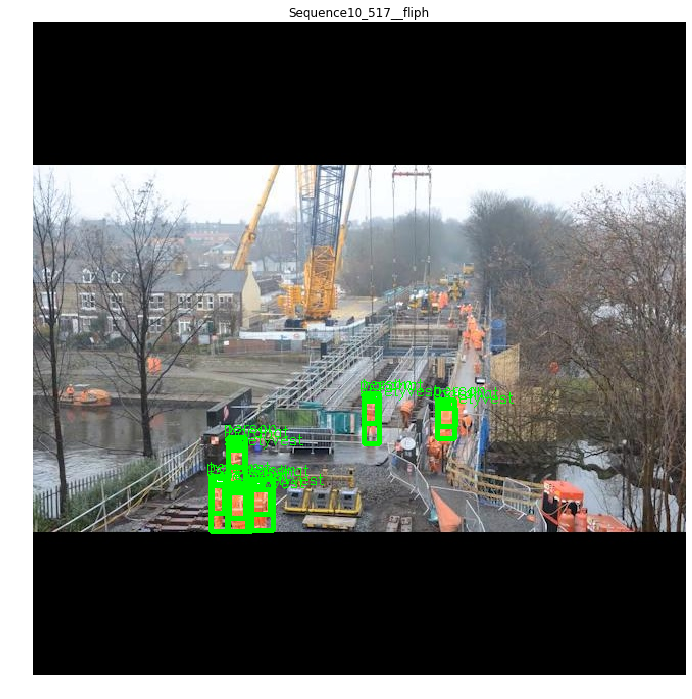

In [129]:
list_of_files = os.listdir(GROUND_TRUTH_DIR)
num_files = len(list_of_files)
random_idx = randint(0,num_files)
text_filepath = list_of_files[random_idx]

with open(GROUND_TRUTH_DIR + text_filepath, 'r') as f:
    truth = f.readlines()
with open(DETECTION_RESULTS_DIR + text_filepath, 'r') as f:
    predictions = f.readlines()
    
image_filepath = IMAGE_DIR + text_filepath.split('.')[0] + '.jpeg'

image_bgr = cv.imread(image_filepath)
image = cv.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

font = cv.FONT_HERSHEY_SIMPLEX

for tru in truth:
    box_coords = np.array(tru.split())
    side1, top, side2, bottom = box_coords[1:5].astype(np.float)
    cv.rectangle(image,(int(side1),int(bottom)),(int(side2),int(top)),(0,255,0),3)
    cv2.putText(image, box_coords[0], (int(side1-5),int(top-5)), font, .5, (0,255,0))

print(f"Drew {len(truth)} ground-truth boxes.")

fig = plt.figure(figsize=(12,12))
plt.title(text_filepath.split('.')[0])
plt.axis('off')
plt.imshow(image)
#cv.rectangle(img,(384,0),(510,128),(0,255,0),3)